In [3]:
import sys
sys.path.insert(0, '/Users/fbickfordsmith/Google Drive/Project/attention')
from contexts_statistics import *

In [4]:
'''
IPython extension to reload modules before executing user code.
https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
'''
%load_ext autoreload
%autoreload 2

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ['o', 'D', 's', 'X']
styles = {
    '0': dict(marker=markers[0], color=colors[0]),
    '1': dict(marker=markers[1], color=colors[1]),
    '2': dict(marker=markers[2], color=colors[2]),
    '3': dict(marker=markers[3], color=colors[3]),
    'in': dict(label='in context', marker=markers[0], color=colors[0]),
    'out': dict(label='out of context', marker=markers[1], color=colors[1])}

In [6]:
def scatter_line(ax, x, y, style):
    ax.scatter(x, y, **style)
    ax.vlines(x, ymin=0, ymax=y, color=style['color'])

In [20]:
def plot_change_acc(df, x):
    fig, ax = plt.subplots()
    scatter_line(ax, x, df['acc_change_in'], styles['in'])
    scatter_line(ax, x, df['acc_change_out'], styles['out'])
    plt.ylabel('Accuracy change')
    plt.legend(title='Source of test examples')
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
    plt.tight_layout()
    return fig, ax

### Semantic contexts

In [22]:
sem_labels = ['kitchen', 'dogs', 'cats', 'wearable', 'transport', 'birds']
sem_labels_plot = ['', 'kitchen\nitems', 'dogs', 'cats', 'wearable\nitems', 'land\ntransport', 'birds']
df_sem = context_summary('sem', 2, 9)
df_sem.insert(0, 'label', sem_labels)
df_sem

,label,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
0,kitchen,35,0.446404,0.512884,0.650968,0.670401,0.527051,0.157517,-0.123917,92
1,dogs,129,0.553892,0.661100,0.643919,0.684884,0.621002,0.023784,-0.022917,31
2,cats,13,0.854177,0.708477,0.645314,0.782407,0.582139,0.073930,-0.063175,134
3,wearable,56,0.432272,0.535303,0.652710,0.660537,0.543158,0.125234,-0.109552,71
4,transport,45,0.428524,0.715678,0.642858,0.773848,0.599449,0.058171,-0.043409,65
5,birds,60,0.534972,0.824636,0.634741,0.863222,0.605363,0.038586,-0.029379,53


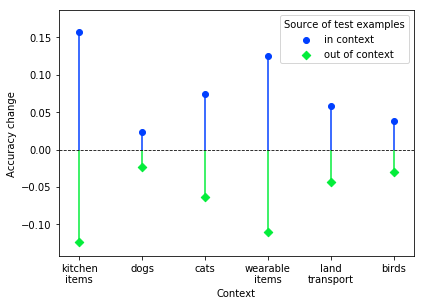

In [23]:
fig, ax = plot_change_acc(df_sem, range(len(df_sem)))
ax.set_xticklabels(sem_labels_plot)
plt.xlabel('Context')
# plt.savefig('semcontexts_acc_change.png', dpi=200)
plt.show()

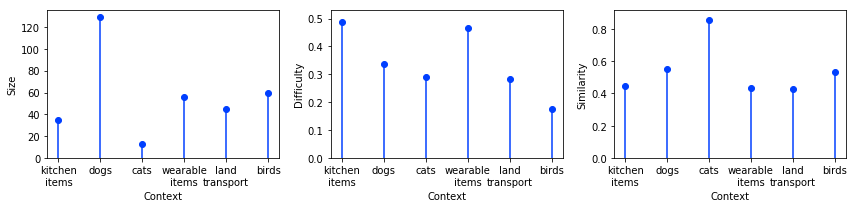

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

scatter_line(ax[0], range(len(df_sem)), df_sem['size'], styles['in'])
scatter_line(ax[1], range(len(df_sem)), 1-df_sem['incontext_base'], styles['in'])
scatter_line(ax[2], range(len(df_sem)), df_sem['similarity'], styles['in'])

# ax[0].bar(range(len(df_sem)), df_sem['size'], alpha=0.7)
# ax[1].bar(range(len(df_sem)), df_sem['incontext_base'], alpha=0.7)
# ax[2].bar(range(len(df_sem)), df_sem['similarity'], alpha=0.7)

ax[0].set_ylabel('Size')
ax[1].set_ylabel('Difficulty')
ax[2].set_ylabel('Similarity')

for a in ax:
    a.set_xticklabels(sem_labels_plot)
    a.set_xlabel('Context')
    a.set_ylim(bottom=0)
    
plt.tight_layout()
# plt.savefig('semcontexts_stats.png', dpi=200)
plt.show()

### Difficulty contexts

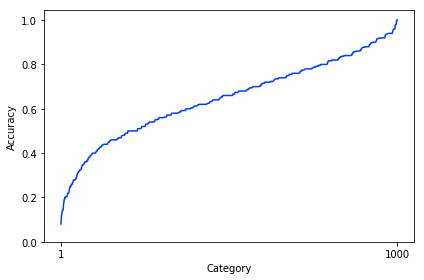

In [9]:
fig, ax = plt.subplots()
plt.plot(range(1000), sorted(df_base['accuracy']))
plt.xticks((0, 999))
ax.set_xticklabels((1, 1000))
# plt.ylim((0, 1))
plt.ylim(bottom=0)
plt.xlabel('Category')
plt.ylabel('Accuracy')
plt.tight_layout()
# plt.savefig('baseline_classwise_acc_line.png', dpi=200)
plt.show()

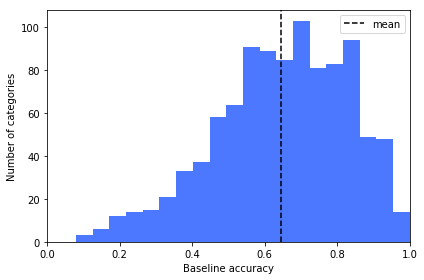

In [10]:
plt.hist(df_base['accuracy'], bins=20, alpha=0.7)#, color='w', edgecolor='black') #alpha=0.5)
plt.axvline(mean_acc, color='k', linestyle='--', label='mean')#, linewidth=1.2)
# plt.axvline(mean_acc-std_acc, color='r', linestyle='--')
# plt.axvline(mean_acc+std_acc, color='r', linestyle='--')
plt.xlim((0, 1))
plt.xlabel('Baseline accuracy')
plt.ylabel('Number of categories')
plt.legend()
plt.tight_layout()
# plt.savefig('baseline_classwise_acc_hist.png', dpi=200)
plt.show()

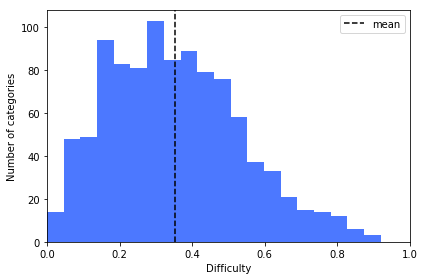

In [11]:
plt.hist(1-df_base['accuracy'], bins=20, alpha=0.7)#, color='w', edgecolor='black') #alpha=0.5)
plt.axvline(np.mean(1-df_base['accuracy']), color='k', linestyle='--', label='mean')#, linewidth=1.2)
# plt.axvline(mean_acc-std_acc, color='r', linestyle='--')
# plt.axvline(mean_acc+std_acc, color='r', linestyle='--')
plt.xlim((0, 1))
plt.xlabel('Difficulty')
plt.ylabel('Number of categories')
plt.legend()
plt.tight_layout()
# plt.savefig('baseline_classwise_acc_hist.png', dpi=200)
plt.show()

In [12]:
df_diff = context_summary('diff')
# df_diff.sort_values('incontext_base', inplace=True)

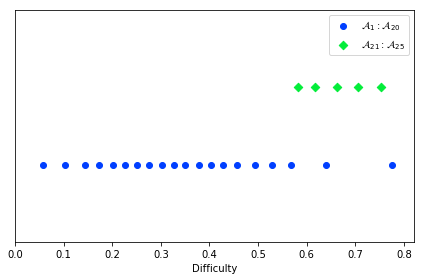

In [13]:
plt.scatter(1-df_diff['incontext_base'][:20], np.ones(20), **styles['0'], label=r'$\mathcal{A}_1 : \mathcal{A}_{20}$')
plt.scatter(1-df_diff['incontext_base'][20:], 2*np.ones(5), **styles['1'], label=r'$\mathcal{A}_{21} : \mathcal{A}_{25}$')
plt.xlim(left=0)
plt.ylim((0, 3))
plt.xlabel('Difficulty')
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend()#title='Contexts')
plt.tight_layout()
# plt.savefig('diffcontexts_baseline.png', dpi=200)
plt.show()

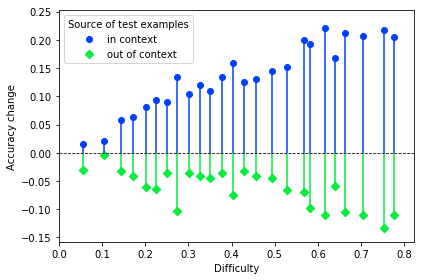

In [14]:
fig, ax = plot_change_acc(df_diff, list(1-df_diff['incontext_base']))
plt.xlabel('Difficulty')
plt.xlim(left=0)
plt.tight_layout()
# plt.savefig('diffcontexts_acc_change.png', dpi=200)
plt.show()

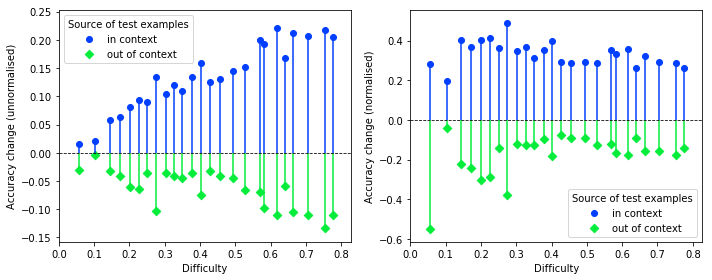

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

difficulty = 1-df_diff['incontext_base']
x = list(1-df_diff['incontext_base'])

scatter_line(ax[0], x, df_diff['incontext_change'], styles['in'])
scatter_line(ax[0], x, df_diff['outofcontext_change'], styles['out'])
scatter_line(ax[1], x, df_diff['incontext_change']/difficulty, styles['in'])
scatter_line(ax[1], x, df_diff['outofcontext_change']/difficulty, styles['out'])

ax[0].set_ylabel('Accuracy change (unnormalised)')
ax[1].set_ylabel('Accuracy change (normalised)')
ax[0].legend(title='Source of test examples')
ax[1].legend(title='Source of test examples')
ax[0].axhline(y=0, color='k', linestyle='--', linewidth=0.8)
ax[1].axhline(y=0, color='k', linestyle='--', linewidth=0.8)

# fig, ax = plot_change_acc(df_diff, list(1-df_diff['incontext_base']))

for a in ax:
    a.set_xlabel('Difficulty')
    a.set_xlim(left=0)
    
plt.tight_layout()
# plt.savefig('diffcontexts_acc_change_norm.png', dpi=200)
plt.show()

### Size contexts

In [16]:
df_size = context_summary('size')
df_size

,size,similarity,incontext_base,outofcontext_base,incontext_trained,outofcontext_trained,incontext_change,outofcontext_change,num_epochs
0,1,1.000000,0.660000,0.646121,0.800000,0.642421,0.140000,-0.003700,100
1,2,0.338592,0.650000,0.646127,0.840000,0.636026,0.190000,-0.010102,100
2,4,0.603180,0.685707,0.645976,0.895288,0.617000,0.209581,-0.028976,100
3,8,0.414381,0.664634,0.645986,0.890863,0.581055,0.226229,-0.064931,100
4,16,0.462032,0.671334,0.645725,0.903394,0.518306,0.232060,-0.127420,100
5,32,0.407476,0.658227,0.645735,0.847840,0.495406,0.189613,-0.150330,100
6,64,0.418547,0.662271,0.645032,0.807429,0.527618,0.145158,-0.117413,100
7,128,0.427468,0.663694,0.643558,0.727816,0.620294,0.064123,-0.023263,23
8,256,0.421248,0.656843,0.642451,0.708441,0.620178,0.051598,-0.022273,41


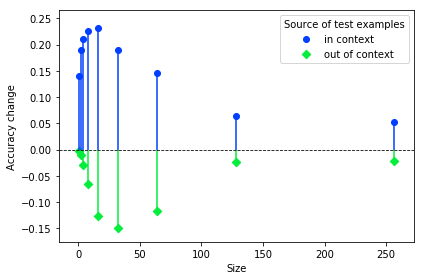

In [17]:
fig, ax = plot_change_acc(df_size, list(df_size['size']))
plt.xlabel('Size')
plt.tight_layout()
# plt.savefig('sizecontexts_acc_change.png', dpi=200)
plt.show()

### Similarity contexts

In [18]:
df_sim = context_summary('sim')
df_sim

,size,similarity,incontext_base,outofcontext_base,incontext_trained,outofcontext_trained,incontext_change,outofcontext_change,num_epochs
0,50,0.722368,0.628814,0.647047,0.722500,0.621209,0.093686,-0.025837,29
1,50,0.530808,0.679750,0.644366,0.787464,0.600166,0.107713,-0.044200,36
2,50,0.475978,0.643354,0.646281,0.778054,0.560003,0.134700,-0.086279,45
3,50,0.450365,0.629162,0.647028,0.745275,0.603746,0.116113,-0.043282,38
4,50,0.782004,0.674659,0.644634,0.758761,0.605015,0.084102,-0.039619,33
5,50,0.573101,0.629006,0.647037,0.773175,0.575437,0.144169,-0.071600,48
6,50,0.472451,0.648156,0.646029,0.769294,0.586546,0.121138,-0.059482,45
7,50,0.422771,0.673201,0.644711,0.730398,0.638606,0.057198,-0.006105,17
8,50,0.673556,0.694332,0.643598,0.772522,0.609121,0.078189,-0.034477,33
9,50,0.506173,0.658442,0.645487,0.802092,0.560112,0.143650,-0.085376,52


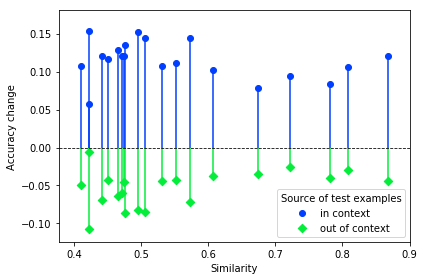

In [20]:
fig, ax = plot_change_acc(df_sim, list(df_sim['similarity']))
plt.xlabel('Similarity')
plt.tight_layout()
plt.savefig('simcontexts_acc_change.png', dpi=200)
plt.show()